## SETUP

In [1]:
# delete all variables
# %reset -f

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import decid_package.my_functions as decid
import decid_package.my_plotfunctions as plotf

from importlib import reload
import seaborn as sns

from matplotlib import rcParams

rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 14,    # slightly larger
    'xtick.labelsize': 12,   # easier to read
    'ytick.labelsize': 12,
    'legend.fontsize': 14
})




## DATA LOADING

### load data

In [3]:
# read files
df_tomst = pd.read_csv("../data/data_92235322_2025_01_30_0.csv", sep = ';', header = None)
diam_tomst = 83.5 # cm (from mail)
df_sap_flow = pd.read_csv("../data/sap_flow.txt", sep = '\t', decimal = ',')
df_natkon = pd.read_csv("../data/diameter_natkon.txt", sep = '\t', decimal = ',')

df_phenocam = pd.read_csv('../data/O_PHENOCAM001_TREE1.csv', sep = ';')

# transform column names
df_tomst.columns = ['ID', 'DateTime', '', 'temp', '', '', 'displacement (µm)', '', '', '']
# drop unused columns
df_tomst = df_tomst.drop(columns=['ID', '', '', '', '', '', '', '', ''])

df_tomst['DateTime'] = pd.to_datetime(df_tomst['DateTime'], format="%Y.%m.%d %H:%M", errors='coerce')
df_sap_flow['DateTime'] = pd.to_datetime(df_sap_flow['DateTime'], format="%d/%m/%Y %H:%M", errors='coerce')
df_natkon['DateTime'] = pd.to_datetime(df_natkon['DateTime'], format="%d/%m/%Y %H:%M", errors='coerce')

df_phenocam['DateTime'] = pd.to_datetime(
    df_phenocam['date'].astype(str) + ' ' + df_phenocam['time'].astype(str),
    format='%d-%m-%y %H:%M',
    errors='coerce'
)

In [4]:
# print(df_sap_flow[(df_sap_flow["DateTime"] >= "2023-11-05 23:40:00") & (df_sap_flow["DateTime"] <= "2023-11-07 00:00:00")])

### raw data plot

In [5]:
sensor_colors = {
    'TOMST': 'tab:orange',
    'Natkon': 'tab:blue',
    'Sap Flow': 'tab:green'
}


#### diameter data

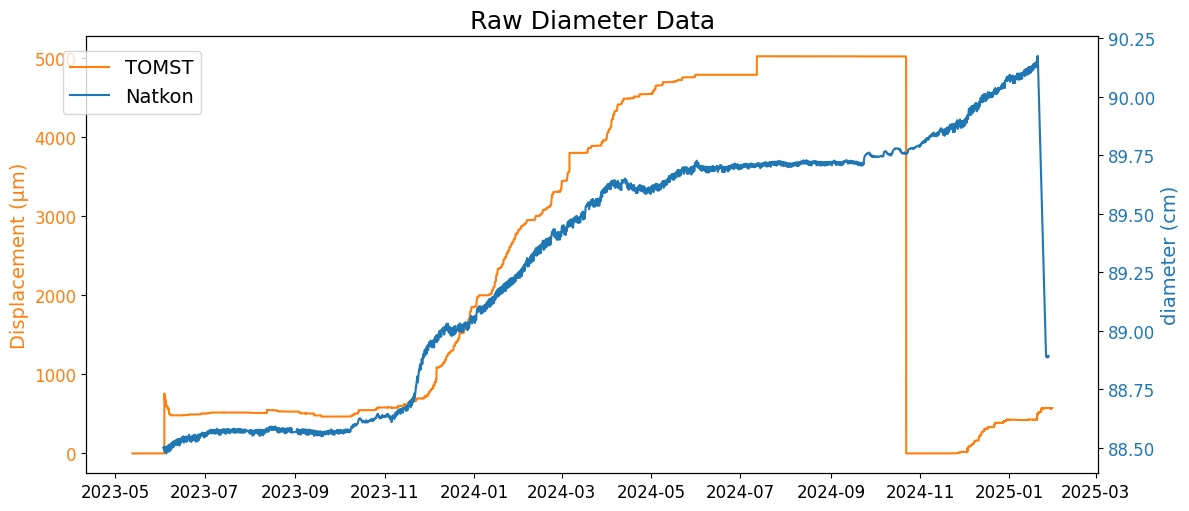

In [6]:
# rawdata plot
fig, ax1 = plt.subplots(figsize=(12,5))

# First y-axis
ax1.plot(df_tomst['DateTime'], df_tomst['displacement (µm)'], label='TOMST', color=sensor_colors['TOMST'])
ax1.set_ylabel('Displacement (µm)', color=sensor_colors['TOMST'])
ax1.tick_params(axis='y', labelcolor=sensor_colors['TOMST'])

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df_natkon['DateTime'], df_natkon['Diameter (cm)'], label='Natkon', color=sensor_colors['Natkon'])
ax2.set_ylabel('diameter (cm)', color=sensor_colors['Natkon'])
ax2.tick_params(axis='y', labelcolor=sensor_colors['Natkon'])

fig.tight_layout()
fig.legend(bbox_to_anchor=(0.18, 0.95))
plt.title('Raw Diameter Data')
plt.show()



C:\Users\decle\AppData\Local\Temp\ipykernel_25704\4287344555.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
C:\Users\decle\AppData\Local\Temp\ipykernel_25704\4287344555.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious['Gap Start'] = suspicious['DateTime'] - suspicious['delta']
C:\Users\decle\AppData\Local\Temp\ipykernel_25704\4287344555.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind


🔍 Suspicious gaps in Natkon (>60 min):
                 Gap Start             Gap End           delta
40489  2023-07-28 23:58:00 2023-07-31 00:00:00 2 days 00:02:00
61901  2023-08-29 18:08:00 2023-09-01 16:44:00 2 days 22:36:00
103155 2023-10-29 00:58:00 2023-10-29 02:00:00 0 days 01:02:00
104051 2023-10-30 07:50:00 2023-10-30 08:52:00 0 days 01:02:00
114581 2023-11-13 23:58:00 2023-11-15 00:00:00 1 days 00:02:00
130023 2023-12-06 11:48:00 2023-12-06 15:04:00 0 days 03:16:00
139649 2023-12-19 23:58:00 2023-12-21 00:00:00 1 days 00:02:00
187867 2024-02-26 00:42:00 2024-02-26 12:42:00 0 days 12:00:00
211985 2024-03-31 00:58:00 2024-03-31 03:00:00 0 days 02:02:00
220533 2024-04-11 23:58:00 2024-04-13 00:00:00 1 days 00:02:00
275336 2024-06-28 03:22:00 2024-06-28 10:36:00 0 days 07:14:00
299373 2024-07-31 21:02:00 2024-08-01 01:48:00 0 days 04:46:00
362916 2024-10-28 09:14:00 2024-10-28 10:16:00 0 days 01:02:00
363327 2024-10-28 23:58:00 2024-10-30 12:46:00 1 days 12:48:00
403254 2024-12-

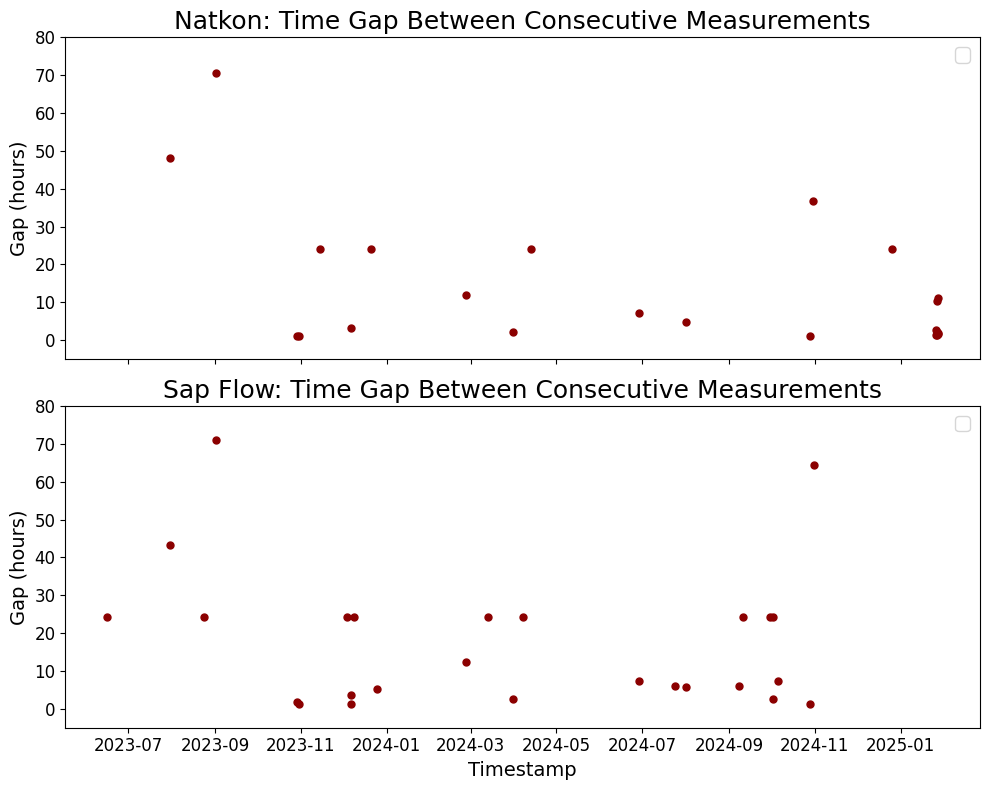

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace these with your actual sensor dataframes and names
dfs = [df_natkon, df_sap_flow]
names = ['Natkon', 'Sap Flow']

gap_threshold_minutes = 60  # Threshold for flagging suspicious gaps
# expected_interval = 30      # Expected sampling interval in minutes

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

for i, (df, name) in enumerate(zip(dfs, names)):
    df = df.copy()
    df['delta'] = df['DateTime'].diff()
    df.loc[df['delta'] == pd.Timedelta(0), 'delta'] = pd.NaT
    
    # Plot time gaps
    df_filtered = ()
    df_filtered = df[df['delta'] > pd.Timedelta(minutes=gap_threshold_minutes)]
    axes[i].plot(df_filtered['DateTime'], df_filtered['delta'].dt.total_seconds()/3600,
             marker='o', linestyle='None', color='darkred', markersize=5)

    # axes[i].axhline(expected_interval, color='gray', linestyle='--', label=f'Expected ({expected_interval} min)')
    axes[i].set_title(f'{name}: Time Gap Between Consecutive Measurements')
    axes[i].set_ylabel('Gap (hours)')
    axes[i].set_ylim(-5,80)
    axes[i].legend()

    # Print suspicious gaps
    suspicious = df[df['delta'] > pd.Timedelta(minutes=gap_threshold_minutes)]
    suspicious['Gap Start'] = suspicious['DateTime'] - suspicious['delta']
    suspicious['Gap End'] = suspicious['DateTime']
    print(f"\n🔍 Suspicious gaps in {name} (>{gap_threshold_minutes} min):")
    print(suspicious[['Gap Start', 'Gap End', 'delta']])

plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()


#### sap flow data

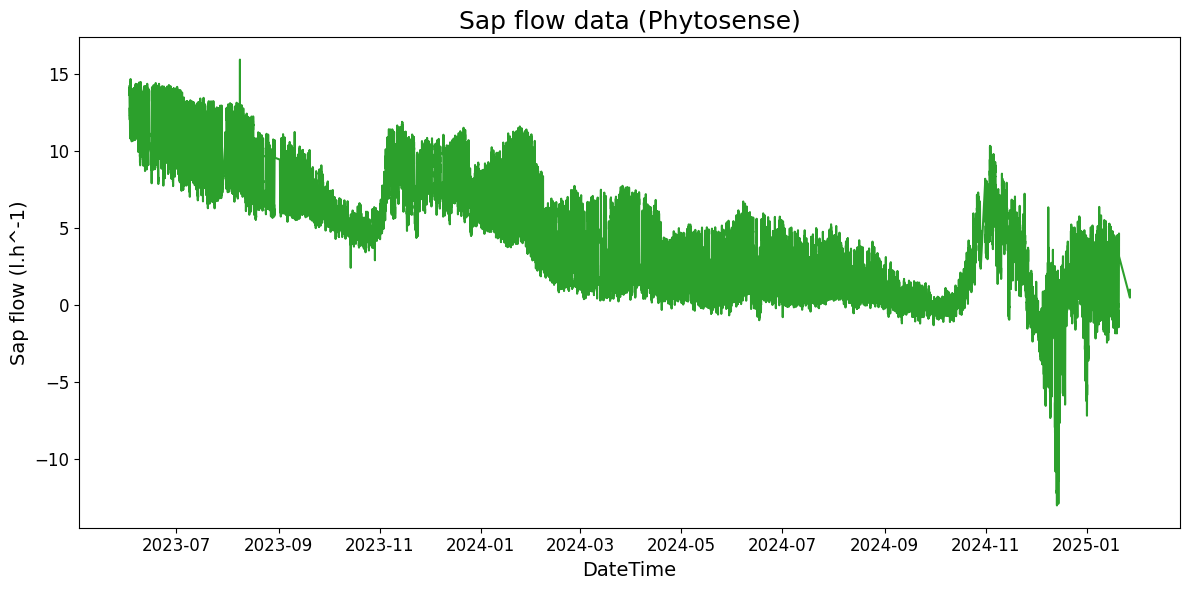

In [8]:
# all sap flow data
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_sap_flow['DateTime'], df_sap_flow['Sap flow (l.h^-1)'], color=sensor_colors['Sap Flow'])
ax.set_ylabel('Sap flow (l.h^-1)')
ax.set_xlabel('DateTime')
plt.title('Sap flow data (Phytosense)')
plt.tight_layout()
plt.show()

# # zoom in on a specific period
# mask = (df_sap_flow['DateTime'] >= '2023-06-05') & (df_sap_flow['DateTime'] < '2023-06-07')
# df_zoom = df_sap_flow.loc[mask]
# fig, ax = plt.subplots(figsize=(12,6))
# ax.plot(df_zoom['DateTime'], df_zoom['Sap flow (l.h^-1)'], color=sensor_colors['Sap Flow'])
# plt.title('Sap flow (Zoomed 2 days)')
# plt.show()


#### phenocam data

In [9]:
print(df_phenocam.columns)
# Set DateTime as index
df_phenocam = df_phenocam.set_index('DateTime')

# Resample daily and compute mean of numeric columns
df_phenocam_daily = df_phenocam[['%leafs', '%flowers', '%fruits']].resample('D').mean().reset_index()

Index(['id_image', 'date', 'time', '%leafs', '%flowers', '%fruits',
       'DateTime'],
      dtype='object')


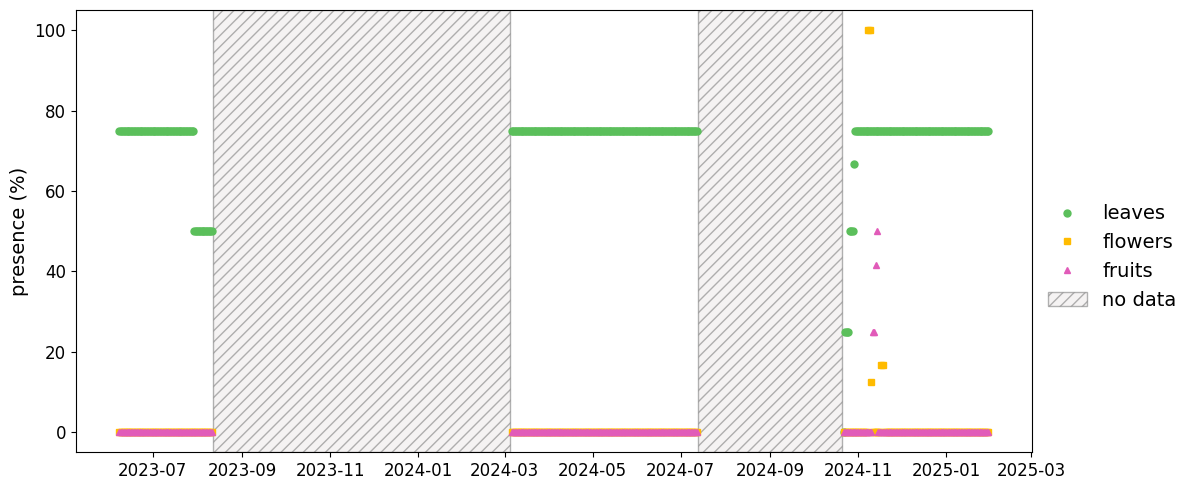

In [10]:

fig, ax = plt.subplots(figsize=(12,5))

# Plot points
ax.plot(df_phenocam_daily['DateTime'], df_phenocam_daily['%leafs'],
        color="#5bbf5b", marker='o', linestyle='None', 
        markersize=5, label='leaves', alpha = 1)
ax.plot(df_phenocam_daily['DateTime'], df_phenocam_daily['%flowers'],
        color="#ffbb00", marker='s', linestyle='None', 
        markersize=5, label='flowers', alpha = 1)
ax.plot(df_phenocam_daily['DateTime'], df_phenocam_daily['%fruits'],
        color="#e15bb9", marker='^', linestyle='None',
         markersize=5, label='fruits', alpha = 1)

ax.set_ylabel('presence (%)')
# ax.set_xlabel('DateTime')
# plt.title('PhenoCam data')
ax.set_ylim(-5, 105)

# Shade periods with missing data (any column)
missing_any = df_phenocam_daily['DateTime'][df_phenocam_daily[['%leafs','%flowers','%fruits']].isna().any(axis=1)]

if not missing_any.empty:
    dates = missing_any.to_numpy()
    gaps = np.split(dates, np.where(np.diff(dates) != np.timedelta64(1, 'D'))[0]+1)
    for i, gap in enumerate(gaps):
        ax.axvspan(gap[0], gap[-1], facecolor="#efecec99",
                   linestyle = None, hatch = '///', alpha = 0.6, 
                   edgecolor = 'grey',
                   label = "no data" if i == 0 else None)
plt.legend(frameon = False, bbox_to_anchor = (1.17, 0.6))
plt.tight_layout()

plt.savefig("../outputs/figures/phenocam_data_raw.png", dpi = 600, bbox_inches='tight')
plt.show()


In [11]:
df_raw = df_sap_flow.sort_values('DateTime')
df_raw['time_diff'] = df_raw['DateTime'].diff()
print(df_raw['time_diff'].value_counts().head(10))


time_diff
0 days 00:20:00    41604
0 days 00:40:00       25
1 days 00:20:00        9
0 days 01:20:00        3
0 days 02:40:00        2
0 days 06:00:00        2
0 days 07:20:00        2
1 days 19:20:00        1
0 days 03:40:00        1
0 days 01:40:00        1
Name: count, dtype: int64


## DATA CLEANING

### TOMST data jumps

In [12]:
df_tomst['Corrected'] = df_tomst['displacement (µm)']

# Identify and correct (downward) jumps
for i in range(1, len(df_tomst)):
    if df_tomst['Corrected'].iloc[i] < df_tomst['Corrected'].iloc[i-1] - 500:  # threshold for reset
        df_tomst.loc[df_tomst.index[i]:, 'Corrected'] += df_tomst['Corrected'].iloc[i-1]
        print(f"Jump corrected at index {i}, DateTime: {df_tomst['DateTime'].iloc[i]}")

Jump corrected at index 50775, DateTime: 2024-10-22 11:00:00


In [13]:
df_tomst['Diameter (cm)'] = df_tomst['Corrected']/ 10000 + diam_tomst # in cm

#### plot

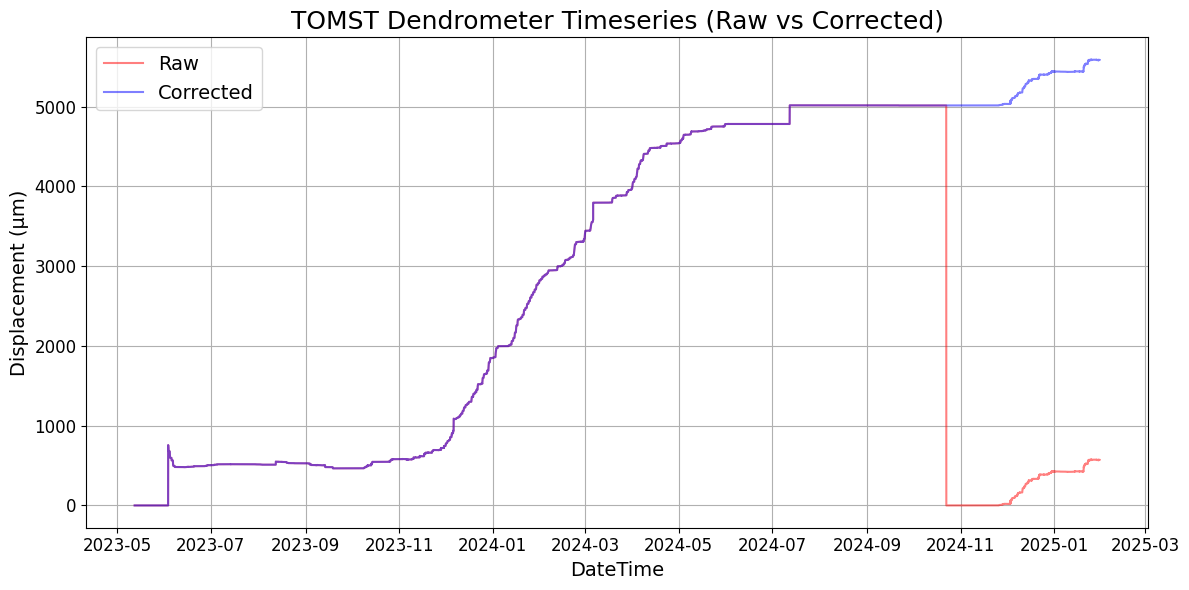

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df_tomst['DateTime'], df_tomst['displacement (µm)'], label='Raw', alpha=0.5, color='red')
plt.plot(df_tomst['DateTime'], df_tomst['Corrected'], label='Corrected', alpha = 0.5, color='blue')
plt.xlabel('DateTime')
plt.ylabel('Displacement (µm)')
plt.title('TOMST Dendrometer Timeseries (Raw vs Corrected)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

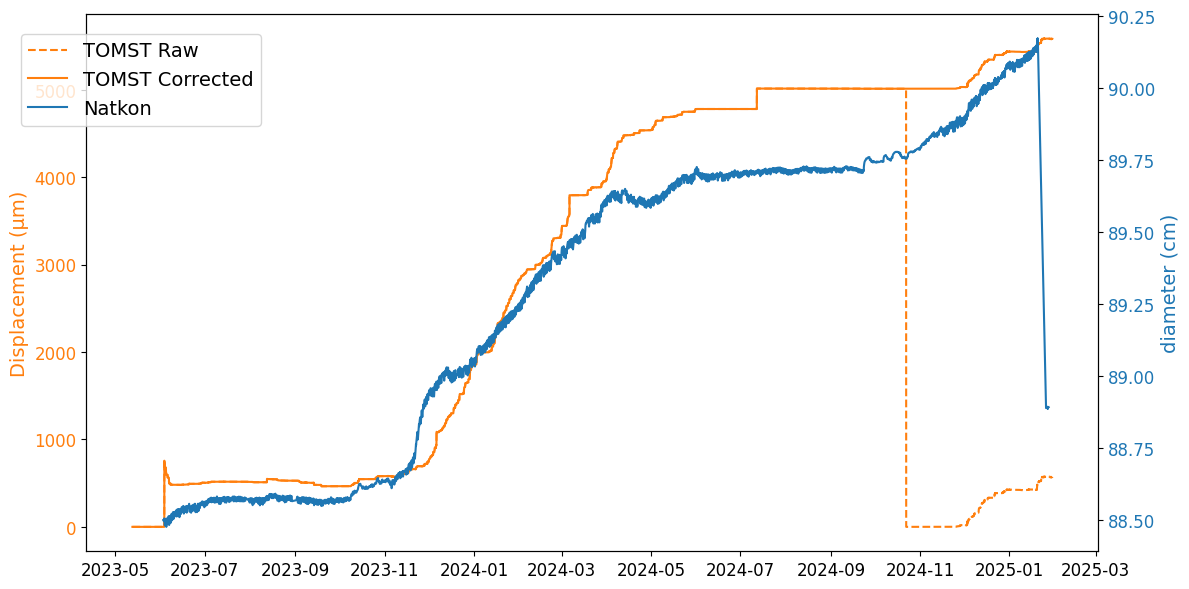

In [15]:
# rawdata plot
fig, ax1 = plt.subplots(figsize=(12,6))

# First y-axis
ax1.plot(df_tomst['DateTime'], df_tomst['displacement (µm)'], label='TOMST Raw', 
         color=sensor_colors['TOMST'], linestyle = '--')
ax1.plot(df_tomst['DateTime'], df_tomst['Corrected'], label='TOMST Corrected', color=sensor_colors['TOMST'])
ax1.set_ylabel('Displacement (µm)', color=sensor_colors['TOMST'])
ax1.tick_params(axis='y', labelcolor=sensor_colors['TOMST'])

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df_natkon['DateTime'], df_natkon['Diameter (cm)'], label='Natkon', color=sensor_colors['Natkon'])
ax2.set_ylabel('diameter (cm)', color=sensor_colors['Natkon'])
ax2.tick_params(axis='y', labelcolor=sensor_colors['Natkon'])

fig.tight_layout()
fig.legend(bbox_to_anchor=(0.23, 0.95))
# plt.title('Raw dendrometer data')


# save figure
# plt.savefig('../outputs/figures/raw_dendrometer_data.png', dpi=600, bbox_inches='tight')


plt.show()

In [16]:
# fig, ax = plt.subplots(figsize=(12,5))

# # Plot TOMST data (already in µm)
# ax.plot(df_tomst['DateTime'], df_tomst['displacement (µm)'], 
#         label='TOMST Raw (µm)', color=sensor_colors['TOMST'], linestyle='--')
# ax.plot(df_tomst['DateTime'], df_tomst['Corrected'], 
#         label='TOMST Corrected (µm)', color=sensor_colors['TOMST'])

# # Plot Natkon data scaled to µm
# ax.plot(df_natkon['DateTime'], (df_natkon['Diameter (cm)']-88.5) * 10000, 
#         label='Natkon Diameter (cm × 10,000)', color=sensor_colors['Natkon'])

# ax.set_ylabel('Scaled Displacement / Diameter (µm)')
# ax.legend(loc='upper left')
# plt.title('TOMST and Natkon on Shared Axis')
# plt.tight_layout()
# plt.show()


### TOMST large flats: flag

In [17]:
# Step 1: Detect consecutive equal values
df_tomst['same_as_prev'] = df_tomst['Corrected'] == df_tomst['Corrected'].shift(1)

# Step 2: Group into blocks of identical values
df_tomst['block_id'] = (df_tomst['same_as_prev'] != df_tomst['same_as_prev'].shift(1)).cumsum()

# Step 3: For each block, calculate start, end, and duration
runs = df_tomst.groupby('block_id').agg(
    value=('Corrected','first'),
    start=('DateTime','first'),
    end=('DateTime','last'),
    length=('Corrected','size')
).reset_index()

runs['duration'] = runs['end'] - runs['start']

# Step 4: Define a threshold (e.g. flat for >= 1 hour or >= N points)
time_threshold = pd.Timedelta(hours=3*24)

runs['is_flat'] = (runs['duration'] >= time_threshold)

# Step 5: Map flag back to original dataframe
flat_blocks = set(runs.loc[runs['is_flat'], 'block_id'])
df_tomst['flat_flag'] = df_tomst['block_id'].isin(flat_blocks).astype(int)


#### plot

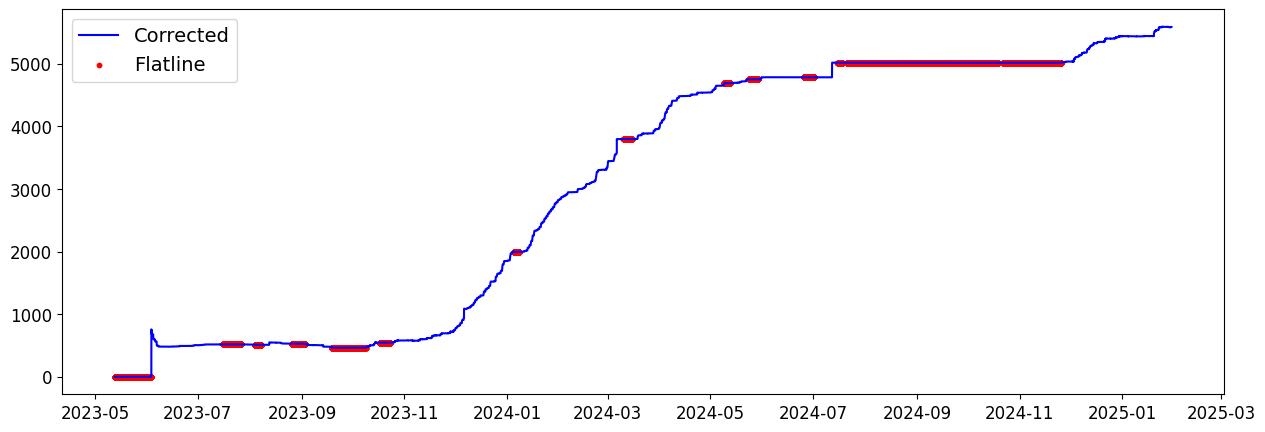

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df_tomst['DateTime'], df_tomst['Corrected'], color='blue', label='Corrected')
plt.scatter(df_tomst.loc[df_tomst['flat_flag']==1, 'DateTime'],
            df_tomst.loc[df_tomst['flat_flag']==1, 'Corrected'],
            color='red', s=10, label='Flatline')
plt.legend()
plt.show()

df_tomst.columns
df_tomst.drop(columns=['same_as_prev', 'block_id'], inplace=True)

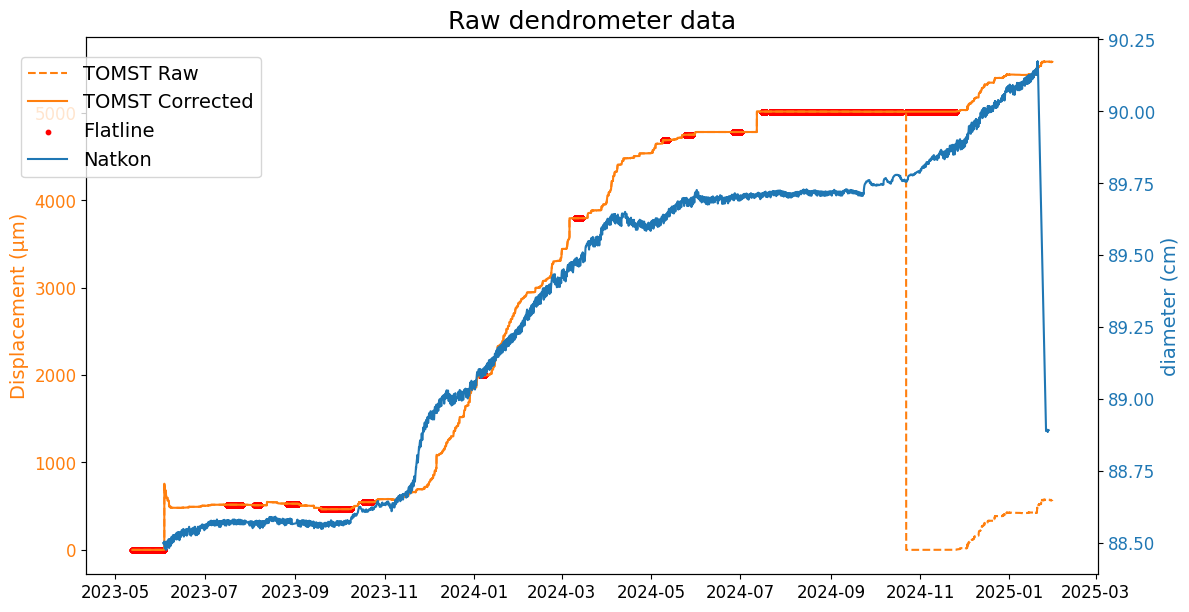

In [19]:
# rawdata plot
fig, ax1 = plt.subplots(figsize=(12,6))

# First y-axis
ax1.plot(df_tomst['DateTime'], df_tomst['displacement (µm)'], label='TOMST Raw', 
         color=sensor_colors['TOMST'], linestyle = '--')
ax1.plot(df_tomst['DateTime'], df_tomst['Corrected'], label='TOMST Corrected', color=sensor_colors['TOMST'])
plt.scatter(df_tomst.loc[df_tomst['flat_flag']==1, 'DateTime'],
            df_tomst.loc[df_tomst['flat_flag']==1, 'Corrected'],
            color='red', s=10, label='Flatline')
ax1.set_ylabel('Displacement (µm)', color=sensor_colors['TOMST'])
ax1.tick_params(axis='y', labelcolor=sensor_colors['TOMST'])

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df_natkon['DateTime'], df_natkon['Diameter (cm)'], label='Natkon', color=sensor_colors['Natkon'])
ax2.set_ylabel('diameter (cm)', color=sensor_colors['Natkon'])
ax2.tick_params(axis='y', labelcolor=sensor_colors['Natkon'])

fig.tight_layout()
fig.legend(bbox_to_anchor=(0.23, 0.95))
plt.title('Raw dendrometer data')


# save figure
# plt.savefig('../outputs/figures/raw_dendrometer_data_flats.png', dpi=600, bbox_inches='tight')


plt.show()

### full time series for all dfs

In [20]:
reload(decid)

<module 'decid_package.my_functions' from 'C:\\Users\\decle\\_GABON_TREE_EXPLORATION_PROJECT\\scripts\\decid_package\\my_functions.py'>

In [21]:
# Sets complete time series and interpolates data 
cleaned_dfs = decid.clean_sensor_data(
    dfs=[df_tomst, df_sap_flow, df_natkon],
    names=['TOMST', 'Sap Flow', 'Natkon'],
    short_gap_limit={'TOMST': 1, 'Sap Flow': 1, 'Natkon': 1}
)

df_tomst_full, df_sap_flow_full, df_natkon_full = cleaned_dfs


df_sap_flow_full.rename(columns={'Sap flow (l.h^-1)': 'Sap_flow'}, inplace=True)
print(df_sap_flow_full.columns)


Index(['DateTime', 'Sap_flow'], dtype='object')


In [22]:
for df, col, name in zip([df_natkon_full, df_tomst_full, df_sap_flow_full], 
                         ['Diameter (cm)', 'Corrected', 'Sap_flow'], 
                         ['Natkon', 'Tomst', 'Sap Flow']):
    na_count = df[col].isna().sum()
    total_values = len(df)
    na_percentage = (na_count / total_values) * 100
    print(f"{name}: {na_count} NA values ({na_percentage:.2f}%)")

Natkon: 13832 NA values (3.17%)
Tomst: 0 NA values (0.00%)
Sap Flow: 1808 NA values (4.15%)


In [23]:
pd.set_option('future.no_silent_downcasting', True)
gaps_natkon = decid.detect_large_gaps(df_natkon_full, 'Diameter (cm)')
gaps_tomst = decid.detect_large_gaps(df_tomst_full, 'Corrected')
gaps_sap_flow = decid.detect_large_gaps(df_sap_flow_full, 'Sap_flow')


gaps_sap_flow.to_csv('../outputs/gaps/gaps_sap_flow.csv', index=False)
gaps_natkon.to_csv('../outputs/gaps/gaps_natkon.csv', index=False)


#### cut all timeseries to the same data, but leave a buffer for later resampling

In [24]:
timeseries_start = max(df_tomst_full['DateTime'].min(), 
                    df_natkon_full['DateTime'].min(), 
                    df_sap_flow_full['DateTime'].min())

buffered_start = timeseries_start - pd.Timedelta(days=1)


end_timestamps = [
    gaps_tomst['Gap Start'].max(),
    gaps_sap_flow['Gap Start'].max(),
    gaps_natkon['Gap Start'].max()
]
valid_timestamps = [ts for ts in end_timestamps if pd.notna(ts)]

timeseries_end = min(valid_timestamps) if valid_timestamps else None
buffered_end = timeseries_end + pd.Timedelta(days=1)

print(buffered_start, '->', buffered_end)


2023-06-01 18:00:00 -> 2025-01-21 12:46:00


In [25]:
df_natkon_cut = df_natkon_full[(df_natkon_full['DateTime'] >= buffered_start) & 
                               (df_natkon_full['DateTime'] <= buffered_end)].copy()

df_tomst_cut = df_tomst_full[ (df_tomst_full['DateTime'] >= buffered_start) 
                             & (df_tomst_full['DateTime'] <= buffered_end)].copy()

df_sap_flow_cut = df_sap_flow_full[(df_sap_flow_full['DateTime'] >= buffered_start)
                                    & (df_sap_flow_full['DateTime'] <= buffered_end)].copy()

In [26]:
for df, col, name in zip([df_natkon_cut, df_tomst_cut, df_sap_flow_cut], 
                         ['Diameter (cm)', 'Corrected', 'Sap_flow'], 
                         ['Natkon', 'Tomst', 'Sap Flow']):
    na_count = df[col].isna().sum()
    total_values = len(df)
    na_percentage = (na_count / total_values) * 100
    print(f"{name}: {na_count} NA values ({na_percentage:.2f}%)")

Natkon: 9336 NA values (2.17%)
Tomst: 0 NA values (0.00%)
Sap Flow: 1406 NA values (3.26%)


#### plots

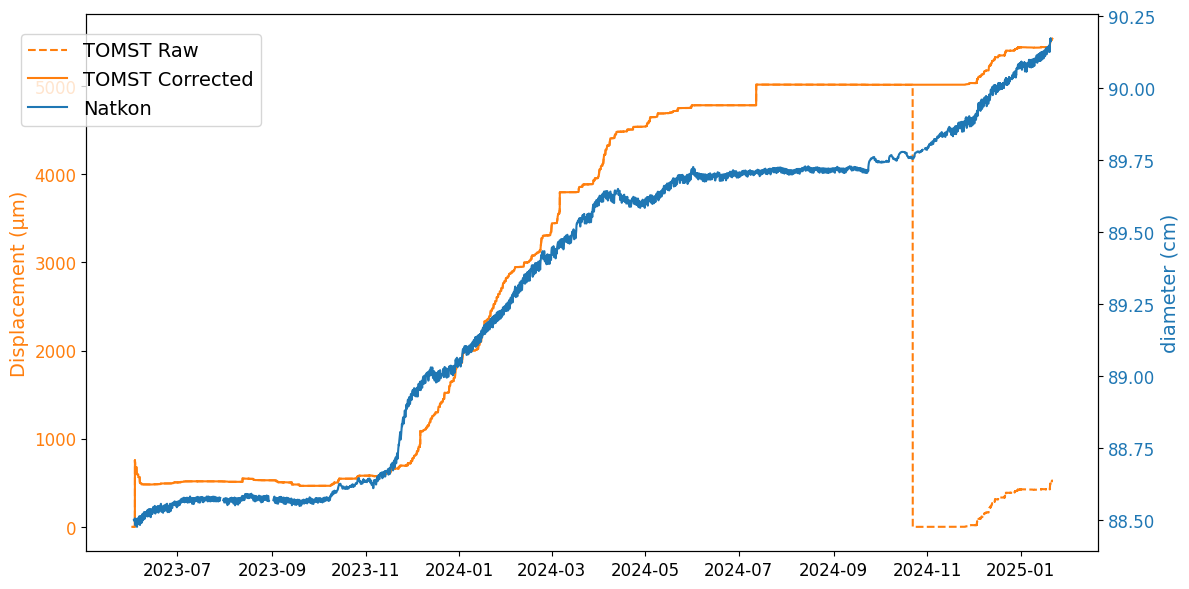

In [27]:
# rawdata plot
fig, ax1 = plt.subplots(figsize=(12,6))

# First y-axis
ax1.plot(df_tomst_cut['DateTime'], df_tomst_cut['displacement (µm)'], label='TOMST Raw', 
         color=sensor_colors['TOMST'], linestyle = '--')
ax1.plot(df_tomst_cut['DateTime'], df_tomst_cut['Corrected'], label='TOMST Corrected', color=sensor_colors['TOMST'])
ax1.set_ylabel('Displacement (µm)', color=sensor_colors['TOMST'])
ax1.tick_params(axis='y', labelcolor=sensor_colors['TOMST'])

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df_natkon_cut['DateTime'], df_natkon_cut['Diameter (cm)'], label='Natkon', color=sensor_colors['Natkon'])
ax2.set_ylabel('diameter (cm)', color=sensor_colors['Natkon'])
ax2.tick_params(axis='y', labelcolor=sensor_colors['Natkon'])

fig.tight_layout()
fig.legend(bbox_to_anchor=(0.23, 0.95))
# plt.title('Raw dendrometer data')


# save figure
plt.savefig('../outputs/figures/raw_dendrometer_data.png', dpi=600, bbox_inches='tight')


plt.show()

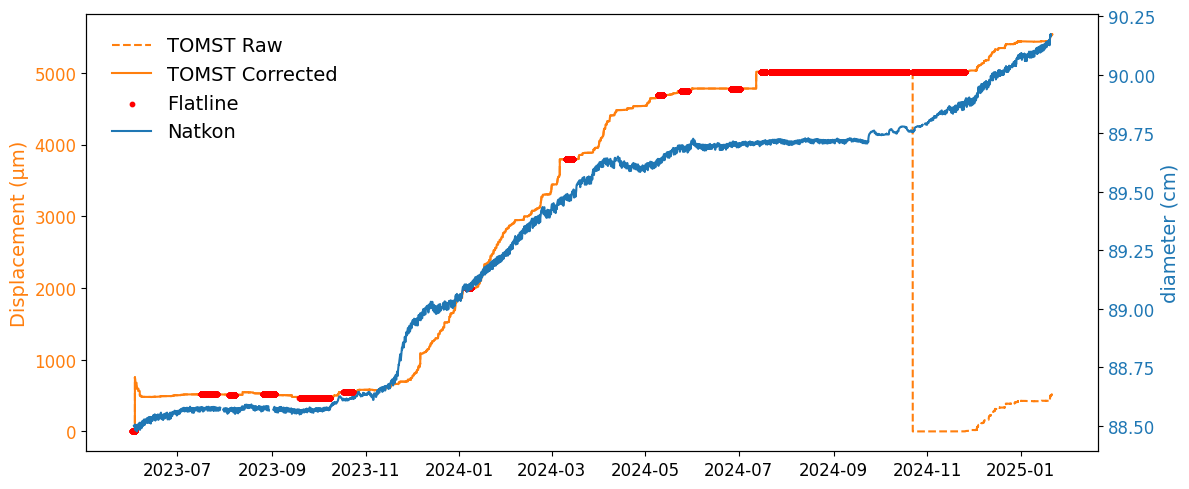

In [28]:
# rawdata plot
fig, ax1 = plt.subplots(figsize=(12,5))

# First y-axis
ax1.plot(df_tomst_cut['DateTime'], df_tomst_cut['displacement (µm)'], label='TOMST Raw', 
         color=sensor_colors['TOMST'], linestyle = '--')
ax1.plot(df_tomst_cut['DateTime'], df_tomst_cut['Corrected'], label='TOMST Corrected', color=sensor_colors['TOMST'])
plt.scatter(df_tomst_cut.loc[df_tomst_cut['flat_flag']==1, 'DateTime'],
            df_tomst_cut.loc[df_tomst_cut['flat_flag']==1, 'Corrected'],
            color='red', s=10, label='Flatline', zorder = 2)
ax1.set_ylabel('Displacement (µm)', color=sensor_colors['TOMST'])
ax1.tick_params(axis='y', labelcolor=sensor_colors['TOMST'])

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df_natkon_cut['DateTime'], df_natkon_cut['Diameter (cm)'], label='Natkon', color=sensor_colors['Natkon'])
ax2.set_ylabel('diameter (cm)', color=sensor_colors['Natkon'])
ax2.tick_params(axis='y', labelcolor=sensor_colors['Natkon'])

fig.tight_layout()
fig.legend(bbox_to_anchor=(0.30, 0.95), frameon = False)
# plt.title('Raw dendrometer data')


# save figure
plt.savefig('../outputs/figures/raw_dendrometer_data_flats.png', dpi=600, bbox_inches='tight')


plt.show()

#### streamline columns

In [29]:
# dendrometer data in same format + change column names: 
df_tomst_cut['Growth_cumulative'] = df_tomst_cut['Corrected']*0.0001
df_natkon_cut['Growth_cumulative'] = df_natkon_cut['Diameter (cm)'] - df_natkon['Diameter (cm)'].iloc[0]

# df_sap_flow.rename(columns={'Sap flow (l.h^-1)': 'Sap_flow'}, inplace=True)£


#### gap inspection

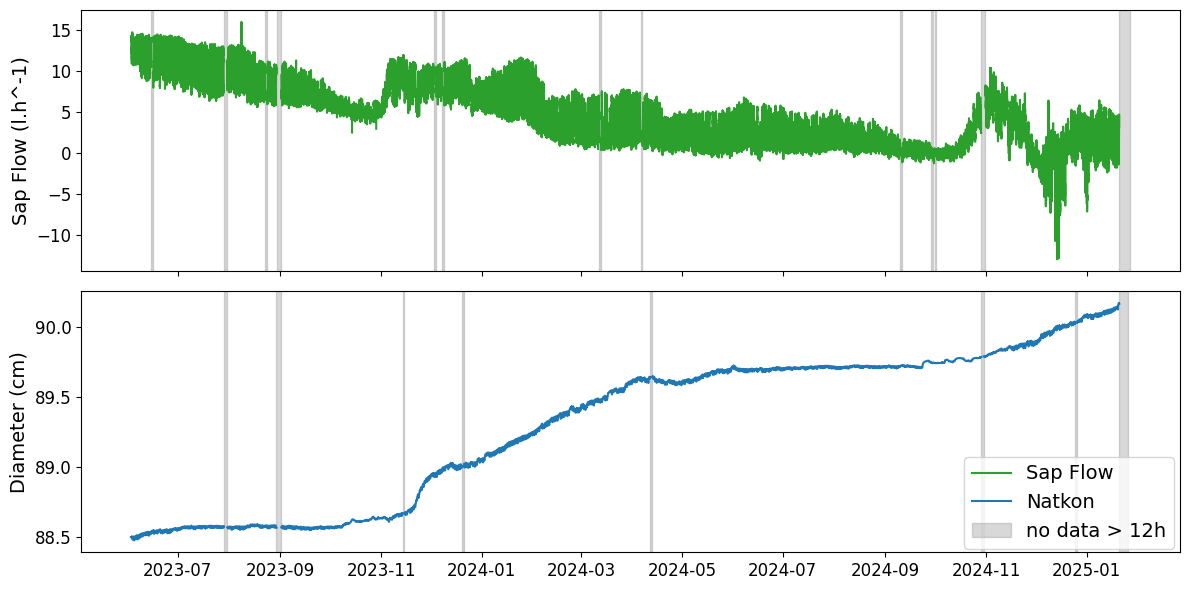

In [30]:
import matplotlib.pyplot as plt

# Sensor configs
df_map = {
    'Natkon': df_natkon_cut,
    'Tomst': df_tomst_cut,
    'Sap Flow': df_sap_flow_cut
}

gap_map = {
    'Natkon': gaps_natkon,
    'Tomst': gaps_tomst,
    'Sap Flow': gaps_sap_flow
}

column_map = {
    'Natkon': 'Diameter (cm)',
    'Tomst': 'Centered',
    'Sap Flow': 'Sap_flow'
}

legend_map = {
    'Natkon': 'Diameter (cm)',
    'Tomst': 'Displacement (cm)',
    'Sap Flow': 'Sap Flow (l.h^-1)'
}


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Loop through sensors
for i, sensor in enumerate(['Sap Flow', 
                            # 'Tomst', 
                            'Natkon']):

    df = df_map[sensor]
    gaps_df = gap_map[sensor]
    color = sensor_colors[sensor]
    column = column_map[sensor]
    label = legend_map[sensor]

    # Plot data
    ax = ax1 if i == 0 else ax2
    ax.plot(df['DateTime'], df[column], color=color, label=sensor)
    ax.set_ylabel(label)
    
    starts = gaps_df['Gap Start']
    ends = gaps_df['Gap End']

    # Shade gaps for this dataset only
    for j, (start, end) in enumerate(zip(starts, ends)):
        ax.axvspan(start, end, color='grey', alpha=0.3,
           label='no data > 12h' if (j == 0 and i == 1) else None)

# Final touches
# fig.suptitle('Sensor Data with Individual Large Gaps Highlighted')
fig.tight_layout()
fig.legend(loc=(0.81, 0.07))


plt.savefig("../outputs/figures/data_gaps_natkon_sapflow.png", dpi=600, bbox_inches='tight')

plt.show()


### detrend sap flow

#### options

In [31]:
# ----- OPTION 1:  x-day rolling mean as trend (NaN-safe)
df_sap_flow_rolling = df_sap_flow_cut.copy()
df_sap_flow_rolling = df_sap_flow_rolling.set_index('DateTime')
df_sap_flow_rolling['Trend'] = df_sap_flow_rolling['Sap_flow'].rolling('365d', center=True, min_periods=1).mean()

# Detrended = original minus trend
df_sap_flow_rolling['Sap_detrended'] = df_sap_flow_rolling['Sap_flow'] - df_sap_flow_rolling['Trend']
df_sap_flow_rolling = df_sap_flow_rolling.reset_index()

trend_start = df_sap_flow_rolling['Trend'].iloc[0]
trend_end = df_sap_flow_rolling['Trend'].iloc[-1]
offset = trend_start - trend_end
df_sap_flow_rolling['Sap_detrended_shifted'] = df_sap_flow_rolling['Sap_detrended'] + offset

# ----- OPTION 2: scipy detrend 
from scipy.signal import detrend
df_detrend = df_sap_flow_cut.copy()
df_detrend = df_detrend.set_index('DateTime')
# Interpolate to avoid NaNs
df_detrend['Sap_interp'] = df_detrend['Sap_flow'].interpolate(method='time')
# Linear detrend (removes only the overall downward trend)
df_detrend['Sap_detrended'] = detrend(df_detrend['Sap_interp'])
df_detrend['Trend'] = df_detrend['Sap_interp'] - df_detrend['Sap_detrended']

trend_start = df_detrend['Trend'].iloc[0]
trend_end = df_detrend['Trend'].iloc[-1]
offset = trend_start - trend_end
df_detrend['Sap_detrended_shifted'] = df_detrend['Sap_detrended'] + offset

# Optionally restore original NaNs
df_detrend.loc[df_detrend['Sap_flow'].isna(), 'Sap_detrended_shifted'] = np.nan
df_detrend = df_detrend.reset_index()




# # ----- OPTION 3: LOESS (takes a while)
# import statsmodels.api as sm

# x = np.arange(len(df_detrend))
# y = df_detrend['Sap_interp'].values

# # Fit a low-order spline to capture slow downward trend
# spl = sm.nonparametric.lowess(y, x, frac=0.1)  # frac controls smoothness
# trend = spl[:,1]

# df_sap_flow_loess = df_detrend.copy()

# df_sap_flow_loess['Trend'] = trend
# df_sap_flow_loess['Sap_detrended'] = df_sap_flow_loess['Sap_interp'] - trend

#### plots

In [32]:
reload(plotf)

<module 'decid_package.my_plotfunctions' from 'C:\\Users\\decle\\_GABON_TREE_EXPLORATION_PROJECT\\scripts\\decid_package\\my_plotfunctions.py'>

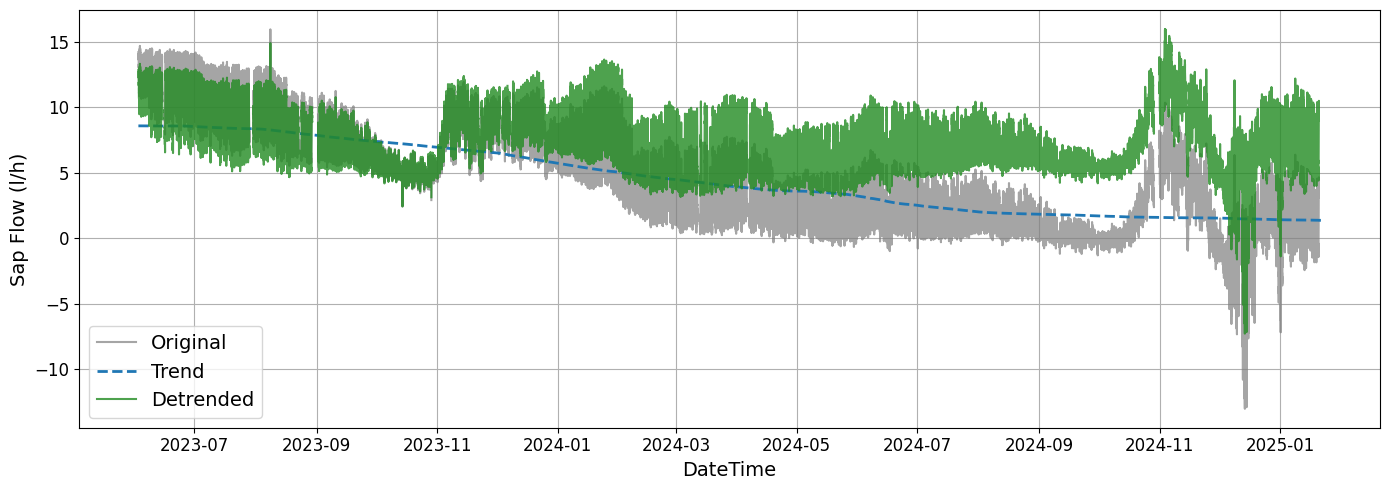

In [33]:
plotf.plot_sap_flow(df_sap_flow_rolling, title_suffix='(365-day rolling window)')
# plotf.plot_sap_flow(df_detrend, title_suffix='(Interpolate and Scipy Detrend)')
# plot_sap_flow(df_sap_flow_loess, title_suffix='(Loess Detrend)')



#### detrend

In [34]:
chosen_detrend_df = df_sap_flow_rolling  #### adjust

df_sap_flow_cut['Detrended_flow'] = chosen_detrend_df['Sap_detrended_shifted']

## smooth data (NATIVE RESOLUTION)

In [35]:
smooth_natkon = decid.smooth_function(df_natkon_cut, 'Growth_cumulative').reset_index()
smooth_tomst = decid.smooth_function(df_tomst_cut, 'Growth_cumulative').reset_index()

smooth_sapflow = decid.smooth_function(df_sap_flow_cut, 'Detrended_flow').reset_index()

In [36]:
print(smooth_natkon.columns)
print(smooth_tomst.columns)
print(smooth_sapflow.columns)

Index(['DateTime', 'Diameter (cm)', 'missing', 'gap_block', 'large_gap',
       'Growth_cumulative', 'smoothed_signal', 'daily_mean',
       'detrended_daily_mean', 'short_trend', 'detrended_short', 'long_trend',
       'detrended_long', 'short_trend_dday_diff'],
      dtype='object')
Index(['DateTime', 'temp', 'displacement (µm)', 'Corrected', 'Diameter (cm)',
       'flat_flag', 'missing', 'gap_block', 'large_gap', 'Growth_cumulative',
       'smoothed_signal', 'daily_mean', 'detrended_daily_mean', 'short_trend',
       'detrended_short', 'long_trend', 'detrended_long',
       'short_trend_dday_diff'],
      dtype='object')
Index(['DateTime', 'Sap_flow', 'missing', 'gap_block', 'large_gap',
       'Detrended_flow', 'smoothed_signal', 'daily_mean',
       'detrended_daily_mean', 'short_trend', 'detrended_short', 'long_trend',
       'detrended_long', 'short_trend_dday_diff'],
      dtype='object')


In [37]:
# print(smooth_natkon.dtypes)
# print(smooth_tomst.dtypes)
# print(smooth_sapflow.dtypes)

#### plots (not used)

In [38]:
# plt.figure(figsize=(15, 10))

# smooth_natkon.reset_index(inplace = True)

# # Raw vs baseline vs detrended
# plt.subplot(3, 1, 1)
# plt.plot(smooth_natkon['DateTime'], smooth_natkon['Growth_cumulative'], label='Raw')
# plt.plot(smooth_natkon['DateTime'], smooth_natkon['short_trend'], label='Baseline (3-day)')
# plt.plot(smooth_natkon['DateTime'], smooth_natkon['long_trend'], label='Baseline (15 days)')
# plt.plot(smooth_natkon['DateTime'], smooth_natkon['detrended_short'], label='Detrended')
# plt.title('Raw, Baseline, and Detrended Natkon signal')
# plt.legend()

# # Rolling amplitude and daily amplitude
# plt.subplot(3, 1, 2)
# # plt.plot(smooth_natkon['DateTime'], smooth_natkon['amp_12h'], label='Rolling 12h Amp')
# plt.plot(smooth_natkon['DateTime'], smooth_natkon['daily_amp'], label='Daily Amp')
# plt.title('Rolling vs Daily Amplitude')
# plt.legend()

# # Daily growth
# plt.subplot(3, 1, 3)
# plt.plot(smooth_natkon['DateTime'], smooth_natkon['short_trend_dday_diff'], label='Daily Growth (Baseline Diff)')
# plt.title('Estimated Daily Growth')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # ----------------------------
# # 2. Zoom on 7-day period
# # ----------------------------
# # Select a 7-day window (adjust dates to your dataset)
# start_date = '2023-11-01'
# end_date   = '2024-01-01'

# zoom = smooth_natkon[(smooth_natkon['DateTime'] >= start_date) &
#                        (smooth_natkon['DateTime'] <= end_date)]

# plt.figure(figsize=(15, 10))

# ax1 = plt.subplot(3, 1, 1)
# ax1.plot(zoom['DateTime'], zoom['Growth_cumulative'], label='Raw', color='tab:blue')
# ax1.plot(zoom['DateTime'], zoom['short_trend'], label='Baseline (3-day)', color='tab:orange')
# ax1.set_ylabel('Diameter (cm) / Baseline', color='black')
# ax1.tick_params(axis='y', labelcolor='black')

# # secondary y-axis for detrended
# ax2 = ax1.twinx()
# ax2.plot(zoom['DateTime'], zoom['detrended_short'], label='Detrended', color='tab:green')
# ax2.set_ylabel('Detrended (cm)', color='tab:green')
# ax2.tick_params(axis='y', labelcolor='tab:green')

# # combine legends
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
# ax1.set_title('Zoom: Raw, Baseline, and Detrended (7 days) NATKON')

# plt.subplot(3, 1, 2)
# # plt.plot(zoom['DateTime'], zoom['amp_12h'], label='Rolling 12h Amp')
# plt.plot(zoom['DateTime'], zoom['daily_amp'], label='Daily Amp')
# plt.title('Zoom: Rolling vs Daily Amplitude')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.plot(zoom['DateTime'], zoom['short_trend_dday_diff'], label='Daily Growth (Baseline Diff)')
# plt.title('Zoom: Estimated Daily Growth')
# plt.legend()

# plt.tight_layout()
# plt.show()
# # now you can plot:

# start_date = '2023-10-01'
# end_date   = '2024-01-01'

# smooth_sapflow.reset_index(inplace = True)
# zoom = smooth_sapflow[(smooth_sapflow['DateTime'] >= start_date) &
#                        (smooth_sapflow['DateTime'] <= end_date)]


# fig = plt.figure(figsize=(15, 10))
# plt.plot(zoom['DateTime'], zoom['detrended_short'], label='Short-term', alpha = 0.5)
# plt.plot(zoom['DateTime'], zoom['detrended_long'], label='Long-term', alpha = 0.5)
# plt.legend()
# plt.show()

# # ----------------------------
# # 2. Zoom on 7-day period
# # ----------------------------
# # Select a 7-day window (adjust dates to your dataset)
# start_date = '2023-06-01'
# end_date   = '2025-01-01'

# zoom = smooth_sapflow[(smooth_sapflow['DateTime'] >= start_date) &
#                        (smooth_sapflow['DateTime'] <= end_date)]

# plt.figure(figsize=(15, 10))

# ax1 = plt.subplot(3, 1, 1)
# ax1.plot(zoom['DateTime'], zoom['Sap_flow'], label='Raw', color='tab:blue')
# ax1.plot(zoom['DateTime'], zoom['short_trend'], label='Baseline (3-day)', color='tab:orange')
# ax1.set_ylabel('Diameter (cm) / Baseline', color='black')
# ax1.tick_params(axis='y', labelcolor='black')

# # secondary y-axis for detrended
# ax2 = ax1.twinx()
# ax2.plot(zoom['DateTime'], zoom['detrended_short'], label='Detrended', color='tab:green')
# ax2.set_ylabel('Detrended (cm)', color='tab:green')
# ax2.tick_params(axis='y', labelcolor='tab:green')

# # combine legends
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
# ax1.set_title('Zoom: Raw, Baseline, and Detrended (7 days)')

# plt.subplot(3, 1, 2)
# # plt.plot(zoom['DateTime'], zoom['amp_12h'], label='Rolling 12h Amp')
# plt.plot(zoom['DateTime'], zoom['daily_amp'], label='Daily Amp')
# plt.title('Zoom: Rolling vs Daily Amplitude')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.plot(zoom['DateTime'], zoom['short_trend_dday_diff'], label='Daily Growth (Baseline Diff)')
# plt.title('Zoom: Estimated Daily Growth')
# plt.legend()

# plt.tight_layout()
# plt.show()
# import matplotlib.pyplot as plt

# # Select zoom window
# start_date = '2023-10-01'
# end_date   = '2023-12-01'
# zoom = smooth_sapflow[(smooth_sapflow['DateTime'] >= start_date) &
#                     (smooth_sapflow['DateTime'] <= end_date)]

# plt.figure(figsize=(15, 12))

# # ------------------------------
# # 1. Raw, Baseline, Short-term & Long-term Detrended
# # ------------------------------
# ax1 = plt.subplot(3, 1, 1)
# ax1.plot(zoom['DateTime'], zoom['Sap_flow'], label='Raw', color='tab:blue')
# ax1.plot(zoom['DateTime'], zoom['short_trend'], label='Baseline (3-day)', color='tab:orange')
# ax1.plot(zoom['DateTime'], zoom['long_trend'], label='Baseline (15 day)', color='tab:green')
# ax1.set_ylabel('Sap Flow / Baseline', color='black')
# ax1.tick_params(axis='y', labelcolor='black')

# # secondary y-axis for detrended signals
# ax2 = ax1.twinx()
# # ax2.plot(zoom['DateTime'], zoom['Sap_flow_detrended_short'], label='Detrended Short-term', color='tab:green')
# # ax2.plot(zoom['DateTime'], zoom['Sap_flow_detrended_long'], label='Detrended Long-term', color='tab:red')
# ax2.set_ylabel('Detrended Sap Flow', color='black')
# ax2.tick_params(axis='y', labelcolor='black')

# # combine legends
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
# ax1.set_title('Zoom: Raw, Baseline, Short- & Long-term Detrended (7 days) SAPFLOW')

# # ------------------------------
# # 2. Rolling amplitude and daily amplitude
# # ------------------------------
# plt.subplot(3, 1, 2)
# # plt.plot(zoom['DateTime'], zoom['amp_12h'], label='Rolling 12h Amp', color='tab:purple')
# plt.plot(zoom['DateTime'], zoom['daily_amp'], label='Daily Amp', color='tab:red')
# plt.title('Zoom: Rolling vs Daily Amplitude')
# plt.ylabel('Amplitude (units)')
# plt.legend()

# # ------------------------------
# # 3. Daily growth (baseline diff)
# # ------------------------------
# plt.subplot(3, 1, 3)
# plt.plot(zoom['DateTime'], zoom['short_trend_dday_diff'], label='Daily Growth (Baseline Diff)', color='tab:brown')
# plt.title('Zoom: Estimated Daily Growth')
# plt.ylabel('Daily Growth (units)')
# plt.legend()

# plt.tight_layout()
# plt.show()


## save data

In [39]:
# Write cleaned data to CSV
smooth_tomst.to_csv('../outputs/df_tomst_cleaned.csv', index=False)
smooth_sapflow.to_csv('../outputs/df_sap_flow_cleaned.csv', index=False)
smooth_natkon.to_csv('../outputs/df_natkon_cleaned.csv', index=False)
df_phenocam_daily.to_csv('../outputs/df_phenocam_cleaned.csv', index = False)